## MNIST Dataset - Digit recognition

I'm using this dataset to practice my deep learning skills with Convolutional Neural Network.

In [1]:
#importing libreries and dataset
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

First we see an image and the corresponding label number

y = 1


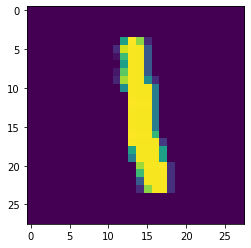

In [3]:
# Example of a picture
index = 6
plt.imshow(X_train[index])
print ("y = " + str((Y_train[index])))

## Normalization

In [4]:
#Normalizing data
X_train = X_train.astype("float")/255.0
X_test = X_test.astype("float")/255.0

#reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000,)


## Build CNN

In [5]:
#import
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History

### Building our model

In [6]:
model = Sequential()
model.add(Conv2D(filters = 36, kernel_size = (3,3),activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train,y=Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3858 - accuracy: 0.8823
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0706 - accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0502 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0385 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0292 - accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0254 - accuracy: 0.9921
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0217 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0180 - accuracy: 0.9939
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0139 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 28s 15m

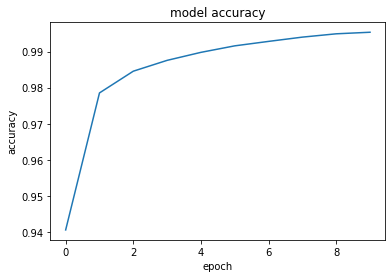

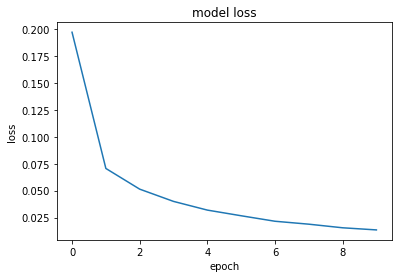

In [49]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 36)        360       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 296,690
Trainable params: 296,690
Non-trainable params: 0
__________________________________________________

In [51]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0324 - accuracy: 0.9905


[0.032393164932727814, 0.9904999732971191]

Insert number: 9999
The number is = 6


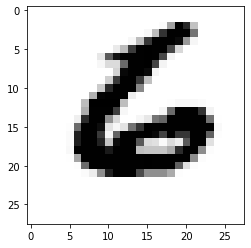

In [55]:
image_index = int(input('Insert number: '))
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print('The number is = ' + str(pred.argmax()))